# Рубежный контроль №2

### Васюнин Михаил ИУ5-61Б

## Задание. 
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

- Метод №1: Линейная/логистическая регрессия
- Метод №2: Случайный лес

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Загрузка датасета
data = pd.read_csv("googleplaystore.csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Предобработка данных 

In [4]:
#Проверка типов данных
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
#Размер датасета
data.shape

(10841, 13)

In [6]:
#Проверка пустых значений
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
#Удаление строк с пустыми значениями
data = data.dropna(axis=0)

In [8]:
#Кодирование категориальных признаков
LE = LabelEncoder()
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = LE.fit_transform(data[col])

<AxesSubplot:>

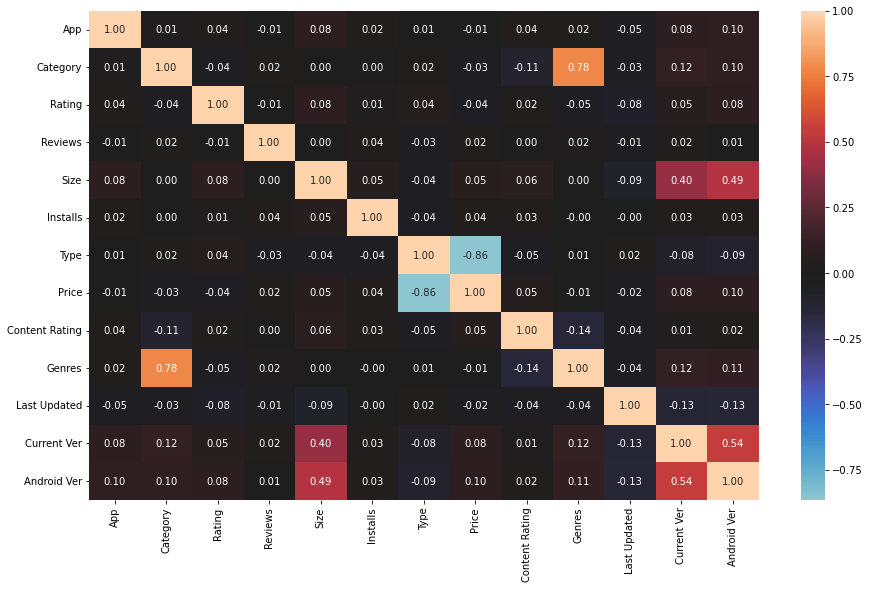

In [9]:
#Построение корреляционной матрицы
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method="pearson"), ax=ax,annot=True, fmt=".2f", center=0)

В качестве целевого признака возьмём столбец "Size"

In [10]:
#Разделение выборки на обучающую и тестовую
target = "Size"
xArray = data.drop(target, axis=1)
yArray = data[target]
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

### Линейная регрессия

In [11]:
LR = LinearRegression()
LR.fit(trainX, trainY)

LinearRegression()

Для оценки качества будем использовать:
- коэффициента детерминации, чтобы узнать насколько модель близка к высококачественной
- корень из средней квадратичной ошибки, чтобы выделить большие ошибки в предсказании модели

In [12]:
R2_LR = r2_score(testY, LR.predict(testX))
RMSE_LR = mean_squared_error(testY, LR.predict(testX), squared=True)

In [13]:
print("Оценка качества модели с помощью коэффициента детерминации: {}".format(R2_LR))
print("Корень из средней квадратичной ошибки: {}".format(RMSE_LR))

Оценка качества модели с помощью коэффициента детерминации: 0.30213774855427833
Корень из средней квадратичной ошибки: 13944.031335971045


С помощью используемых метрик, можем сделать вывод, что качество модели низкое в связи с низкой корреляцией целевого признака с другими параметрами

### Случайный лес

In [14]:
RT = RandomForestRegressor(n_estimators=10, random_state=1)
RT.fit(trainX, trainY)

RandomForestRegressor(n_estimators=10, random_state=1)

In [15]:
R2_RT = r2_score(testY, RT.predict(testX))

In [16]:
RMSE_RT= mean_squared_error(testY, RT.predict(testX), squared=True)

In [17]:
print("Оценка качества модели с помощью коэффициента детерминации: {}".format(R2_RT))
print("Корень из средней квадратичной ошибки: {}".format(RMSE_RT))

Оценка качества модели с помощью коэффициента детерминации: 0.48462058549409814
Корень из средней квадратичной ошибки: 10297.829823717948


В данном случае, можем увидеть, что ансамблевая модель случайного леса предсказывает значения с наибольшей точностью в отличие от модели линейной регрессии. Однако качество модели всё ещё низкое.